# Twitter sentiment analysis for English premier league football clubs

#### Our goal is to prepare a machine learning model which can analyze tweets related to football teams and predict sentiment for each tweet. This can be used to find out the most hated/ loved football clubs on social media platforms and give us an insight about the club's public image. 

### Importing required libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Importing the EPL tweets dataset 

The dataset consists of tweets about the teams competing in the english premier league.

In [3]:
epl_data = pd.read_csv("C:\\Users\\pmunj\\Desktop\\epl_nlp_project\\tweets.csv")

In [4]:
epl_data.head()

,created_at,file_name,followers,friends,group_name,location,retweet_count,screenname,search_query,text,twitter_id,username,polarity,partition_0,partition_1
0,2020-09-23 18:39:34,CrystalPalace,66,495,Crystal Palace FC,NaN,0,tw_footballtalk,#CrystalPalace OR #CPFC,Onto Week 2 of Premier League Stars of the Wee...,1308838436233711616,TW,0.0000,EPL,CrystalPalace
1,2020-09-23 18:39:18,CrystalPalace,0,0,Crystal Palace FC,NaN,0,crystalpalaced1,#CrystalPalace OR #CPFC,Our palace team will put our hearts out for ou...,1308838367254269954,crystalpalacedan,0.1531,EPL,CrystalPalace
2,2020-09-23 18:28:15,CrystalPalace,4292,3437,Crystal Palace FC,London,0,palaceupdates4u,#CrystalPalace OR #CPFC,Chelsea v Palace kick-off time changed and TV ...,1308835588229996545,Crystal Palace News,0.0000,EPL,CrystalPalace
3,2020-09-23 18:28:15,CrystalPalace,4292,3437,Crystal Palace FC,London,0,palaceupdates4u,#CrystalPalace OR #CPFC,Academy redevelopment update: Exclusive footag...,1308835585902116867,Crystal Palace News,0.1280,EPL,CrystalPalace
4,2020-09-23 18:27:39,CrystalPalace,0,0,Crystal Palace FC,NaN,0,crystalpalaced1,#CrystalPalace OR #CPFC,@ChelseaFC I still have no entire clue why us ...,1308835436652105728,crystalpalacedan,-0.1027,EPL,CrystalPalace


In [5]:
epl_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211342 entries, 0 to 211341
Data columns (total 15 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   created_at     211342 non-null  object 
 1   file_name      211342 non-null  object 
 2   followers      211342 non-null  int64  
 3   friends        211342 non-null  int64  
 4   group_name     211342 non-null  object 
 5   location       149105 non-null  object 
 6   retweet_count  211342 non-null  int64  
 7   screenname     211342 non-null  object 
 8   search_query   211342 non-null  object 
 9   text           211342 non-null  object 
 10  twitter_id     211342 non-null  int64  
 11  username       211341 non-null  object 
 12  polarity       211342 non-null  float64
 13  partition_0    211342 non-null  object 
 14  partition_1    211342 non-null  object 
dtypes: float64(1), int64(4), object(10)
memory usage: 24.2+ MB


In [6]:
epl_data['search_query'].value_counts()

#ManchesterUnited OR #ManUnited OR #MUFC    40307
#liverpoolfc OR #YNWA OR #LFC               38250
#Arsenal OR #AFC OR #COYG                   34653
#Tottenham OR #THFC OR #SPURS               24417
#Everton OR #EFC                            21147
#ManchesterCity OR #ManCity OR #MCFC        19192
#LeicesterCity OR #LCFC                     10307
#CrystalPalace OR #CPFC                      7986
#Chelsea OR #ChelseaFC #CFC                  7088
#SouthamptonFC OR #Southampton               3699
#Burnley OR #BurnleyFC                       2444
#Bournemouth                                 1852
Name: search_query, dtype: int64

#### Note: Here we can see each tweet is extracted by using the hashtags mentioned above, so we can expect to have atleast one of these hashtags in every tweet present in the dataset. These words/ hashtags do not contribute to the sentiment displayed by the tweet and might affect our algorithm later beacuse they are present in a large number.

So with some knowledge of football and the above data, we will be preparing a list of words that contains the above hashtags, team names and some other terms by which these teams are referred to. For example: people use words like 'United','ManUtd', 'MUFC' when they are referring to Manchester United.    

In [7]:
words_remove = ['ManchesterUnited', 'ManUnited', 'MUFC','mufc', 'manchester', 'liverpoolfc', 'liverpool', 'LFC', 'YNWA',
               'ynwa', 'lfc', 'Liverpool', 'Arsenal', 'AFC','COYG', 'arsenal','afc','Tottenham', 'tottenham', 'THFC', 'thfc','spurs',
               'SPURS','Everton','everton', 'EFC', 'ManchesterCity', 'manchestercity', 'city', 'Mancity', 'mancity', 'MCFC', 'mcfc',
               'LeicesterCity', 'leicestercity', 'leicester', 'LCFC', 'lcfc', 'CrystalPalace', 'crystalpalace', 'palace', 'CPFC', 'cpfc'
               , 'Chelsea', 'chelsea', 'ChelseaFC', 'CFC', 'cfc', 'SouthamptonFC', 'southampton', 'Southampton', 'Burnley', 'BurnleyFC',
               'burnley','Bournemouth', 'bournemouth', 'United', 'united']

These words will be later on removed from the tweets while preprocessing the tweets

###### For performing sentiment analysis we require the text and the polarity column of the dataset. So we'll extract that out as our main dataset

### Data preprocessing and exploratory data analysis 

In [8]:
epl_data = epl_data[["text", "polarity"]]
epl_data.head()

,text,polarity
0,Onto Week 2 of Premier League Stars of the Wee...,0.0000
1,Our palace team will put our hearts out for ou...,0.1531
2,Chelsea v Palace kick-off time changed and TV ...,0.0000
3,Academy redevelopment update: Exclusive footag...,0.1280
4,@ChelseaFC I still have no entire clue why us ...,-0.1027


In [9]:
epl_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211342 entries, 0 to 211341
Data columns (total 2 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   text      211342 non-null  object 
 1   polarity  211342 non-null  float64
dtypes: float64(1), object(1)
memory usage: 3.2+ MB


We fortunately don't have any missing values in our new dataset and the columns have appropriate data types too 

Plotting the distribution of values in the polarity column of the dataset

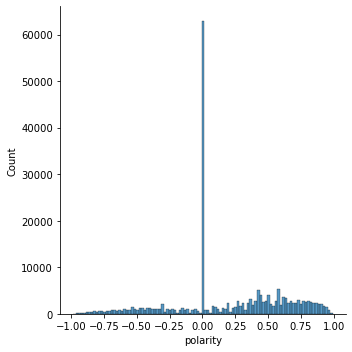

In [10]:
sns.displot(data = epl_data, x = "polarity")

In [11]:
print("maximum and minimum values:",epl_data['polarity'].max(), epl_data['polarity'].min())

maximum and minimum values: 0.9927 -0.9848


###### The problem here is that the polarity of tweets is a continuous variable ranging from approximately -1 to +1. For sentiment analysis, we'd prefer to have discrete values for certain sentiments,  say 1 = negative ; 2 = neutral; 3 = positive. 

We'll have to perform binning on the continuous variable to group the values and tweets into seperate sentiment classes

In [12]:
bins = np.linspace(min(epl_data['polarity']), max(epl_data['polarity']), 4)
print(list(bins))

[-0.9848, -0.32563333333333333, 0.33353333333333335, 0.9927]


In [13]:
group_names = ['1','2','3']
epl_data['sentiment'] = pd.cut(epl_data['polarity'], bins, labels = group_names, include_lowest = True)

In [14]:
epl_data.head(10)

,text,polarity,sentiment
0,Onto Week 2 of Premier League Stars of the Wee...,0.0000,2
1,Our palace team will put our hearts out for ou...,0.1531,2
2,Chelsea v Palace kick-off time changed and TV ...,0.0000,2
3,Academy redevelopment update: Exclusive footag...,0.1280,2
4,@ChelseaFC I still have no entire clue why us ...,-0.1027,2
5,"Pizza fight suggestions wrong, #CPFC wonderkid...",-0.6908,1
6,"HE WORKS WHEN HE WANTS, HE WORKS WHEN HE WAAAA...",0.0000,2
7,It’s game week 🙌🏻 we play @RoversLadies Sunday...,0.3400,3
8,Come on down and snag this NEW #Verdant 🤤 ‘Unf...,0.0000,2
9,"🥊 An inspirational journey from Palace fan, @R...",0.8271,3


Now we have a discrete sentiment for each tweet. We can now plot the distribution of these sentiments to get a better feel of our dataset

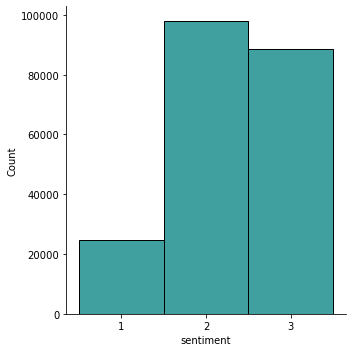

In [15]:
sns.displot(data= epl_data, x = 'sentiment', color = 'teal')

###### It is quite clear now that neutral and positive tweets dominate the dataset. An unbalanced dataset can affect our real lfe predictions so our goal is now to  make this dataset balanced. 

To make this happen we can either add negative tweets to the dataset or we can remove neutral and positive tweets. I'll be removing neutral and positive tweets as the dataset is aready pretty large and even after removal of tweets I'll be left with plenty of data to work with. Also it's easier of the two options.

This method of balancing the dataset is called Undersampling

### Random Under-sampling

In [17]:
class_1 = epl_data[epl_data['sentiment'] == '1']
class_2 = epl_data[epl_data['sentiment'] == '2']
class_3 = epl_data[epl_data['sentiment'] == '3']

print('class 1:', class_1.shape)
print('class 2:', class_2.shape)
print('class 3:', class_3.shape)

class 1: (24729, 3)
class 2: (97967, 3)
class 3: (88646, 3)


We'll try to take out random samples from the positive and neutral classes equal to the number of negative class

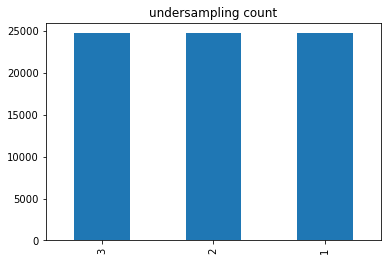

In [18]:
class_2_under = class_2.sample(class_count1)
class_3_under = class_3.sample(class_count1)
test_under = pd.concat([class_1, class_2_under, class_3_under], axis = 0)

test_under['sentiment'].value_counts().plot(kind = 'bar', title = 'undersampling count')

In [19]:
test_under['sentiment'].value_counts()

3    24729
2    24729
1    24729
Name: sentiment, dtype: int64

we don't require the continuous variable 'polarity' anymore

In [20]:
test_under.drop(columns = ['polarity'], inplace = True)

test_under is our undersampled dataset where all the sentiments have equal number of entries in the dataframe

### Cleaning the texts for machine learning 

In [23]:
test_under.shape

(74187, 2)

In [24]:
import re
import nltk 
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\pmunj\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [25]:
test_under.reset_index(drop = True, inplace = True)
test_under.head()

,text,sentiment
0,"Pizza fight suggestions wrong, #CPFC wonderkid...",1
1,"Meyer on fire, Clyne trains with Palace &amp; ...",1
2,"While I know this is a football account, I wan...",1
3,@Carl_Unofficial why has it gone so dead on th...,1
4,"Musa's comments about 'duos' in this episode, ...",1


##### Now we are trying to clean the text for vectorization and training the model. We'll try to remove stuff like hashtags, mentions, any type of url, and also the words present in the words_remove list created at the start that contains team names and other unnecessary terms

In [26]:
corpus = []
for i in range(0,74187):
    tweet = re.sub(r"http\S+" , " ", test_under['text'][i])
    tweet = tweet.replace('#', '')
    tweet = re.sub(r'@[A-Za-z0-9]+', ' ', tweet)
    tweet = re.sub('[^a-zA-Z]', ' ', tweet)
    tweet = tweet.lower()
    tweet = tweet.split()
    temp = tweet
    for stuff in list(temp):
        if stuff in words_remove:
            tweet.remove(stuff)
        
    ps = PorterStemmer()
    all_stopwords = stopwords.words('english')
    all_stopwords.remove('not')
    tweet = [ps.stem(word) for word in tweet if word not in set(all_stopwords)]
    tweet = ' '.join(tweet)
    corpus.append(tweet)

In [27]:
print(corpus[0:10])

['pizza fight suggest wrong wonderkid say interview nation media epl', 'meyer fire clyne train amp batshuayi celebr fail cctv', 'know footbal account want state ever blm sayhernam louisvil not announc today alway fight mistreat', 'unoffici gone dead transfer front worri', 'musa comment duo episod whatev reason remind question reunion video jame mccarthi jame mcarthur former sign crystal', 'know fact take knee help one young boy understand racism around world reason alon good job continu', 'jami carragh tell avfc midfield jack grealish amp winger wilfri zaha not good enough', 'bad day thing get bore look minut burn watch video via', 'sean dych caus controversi thought premier leagu bailout lower leagu club avfc bhafc efc ffc lufc nufc sufc twitterblad saintsfc coy whufc coyi wwfc wolv wba', 'rememb racist attack ian wright teen question charg']


### Creating the Bag of words model

In [28]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features = 2000, decode_error = 'replace')
x = cv.fit_transform(corpus).toarray()
y = test_under.iloc[:,-1].values

### Splitting into training and test set

In [29]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

### Training the model 

##### I tested various models and Logistic regression model gave me the best results. Since we are predicting more tha two classes i.e positive/neutral/negative we'll use the one vs rest approach. The max_iter variable has been set to 200 as the default 100 iterations were not enough for the algorithm to converge.

In [30]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(multi_class = 'ovr', solver = 'liblinear', max_iter = 200)
classifier.fit(x_train, y_train)

LogisticRegression(max_iter=200, multi_class='ovr', solver='liblinear')

### Predicting the test set results

In [31]:
y_pred = classifier.predict(x_test)

In [32]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_pred, y_test)
print(cm)
accuracy_score(y_pred, y_test)

[[3911  573  251]
 [ 626 3873  790]
 [ 282  529 4003]]


0.7943792964011323

### K-Fold Cross Validation 

In [33]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = x_train, y = y_train, cv =5)
print("accuracy = {:.2f}%".format(accuracies.mean()*100))

accuracy = 79.12%


In [34]:
from sklearn.metrics import f1_score
f1_score(y_test, y_pred, average = 'weighted')

0.7950058641096598

Feels like a decent score 

### Making an individual prediction 

To make an individual prediction we'll have to preprocess the single tweet just like we did on training set  

In [36]:
new_corpus = []
#this is a random text just for testing out the model on individual predictions
test_tweet = '''manchester city sucks #mufc #united @bruno @harry http://anbvdajvh'''
test_tweet = test_tweet.replace('#','')
test_tweet = re.sub(r"http\S+" , " ", test_tweet)
test_tweet = re.sub(r'@[A-Za-z0-9]+', ' ', test_tweet)
test_tweet = re.sub('[^a-zA-Z]', ' ', test_tweet)
test_tweet = test_tweet.lower()
test_tweet = test_tweet.split()
temp_tweet = test_tweet
for w in list(temp_tweet):
    if w in words_remove:
        test_tweet.remove(w)        
ps = PorterStemmer()
all_stopwords = stopwords.words('english')
all_stopwords.remove('not')
test_tweet = [ps.stem(word) for word in test_tweet if word not in set(all_stopwords)]
test_tweet = ' '.join(test_tweet)
new_corpus.append(test_tweet)

In [37]:
print(new_corpus)

['suck']


In [53]:
new_x = cv.transform(new_corpus).toarray()
sentiment = classifier.predict(new_x)
print(sentiment)
if sentiment == '1':
    print("negative")
elif sentiment == "2":
    print("neutral")
else:
    print("positive")

['1']
negative


We used transform instead of fit_transform above as we want the new tweet to be transformed with the count vectorizer that was created according to the training data

### Saving the model for future use

Since I want to use this model in my streamlit web app I am going to save this model using the pickle library 

In [40]:
import pickle

In [40]:
filename = 'model.sav'
vectorizer = 'vecorizer.pkl'
pickle.dump(classifier, open(filename, 'wb'))
with open(vectorizer, 'wb') as fw:
     pickle.dump(cv.vocabulary_, fw)

we have now saved the model and also the vocabulary created by the count vectorizer for future text preprocessing and predictions